In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datas = pd.read_csv("PSante_04_app_products.csv", encoding="utf-8")
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114720 entries, 0 to 114719
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   brands                   114720 non-null  object 
 1   manufacturing_places     114720 non-null  object 
 2   countries                114720 non-null  object 
 3   origins                  114720 non-null  object 
 4   product_name             114720 non-null  object 
 5   nutriscore_grade         85490 non-null   object 
 6   energy_100g              95664 non-null   float64
 7   saturated-fat_100g       93105 non-null   float64
 8   fiber_100g               52113 non-null   float64
 9   proteins_100g            95898 non-null   float64
 10  sodium_100g              94542 non-null   float64
 11  nutrition-score-fr_100g  85492 non-null   float64
dtypes: float64(6), object(6)
memory usage: 10.5+ MB


Maintenant, je vais analyser les variables 6 à 11 et les compléter ce qui me permettra enfin de m'occuper de nutriscore_grade qui est directement définie grâce à nutrition-score-fr_100g

Je vais commencer par afficher un histogramme avec les valeurs des moyennes +- 1 à 3 écart-types et les quartiles

In [2]:
cols = ["energy_100g", "saturated-fat_100g", "fiber_100g", "proteins_100g", "sodium_100g", "nutrition-score-fr_100g"]

In [41]:
import math
from scipy import stats

def graph(data, colonnes):
    
    for col in colonnes:
        print(f"Etude de {col}:\n")

        val_notnull = data[data[col].isnull() == False][col]
        
        moy = val_notnull.mean()
        std_val = val_notnull.std(ddof=0)
        print(f"Moyenne = {moy}\nEcart-type = {std_val}\nCoef de Variation = {std_val/moy}")
        perc_moy = round(stats.percentileofscore(val_notnull, moy))
        print(f"Percentile à la moyenne:\n\t{perc_moy}% < à moyenne\n\t{100-perc_moy}% > à moyenne")
        perc_moy = round(stats.percentileofscore(val_notnull, moy + std_val))
        calcul = val_notnull.quantile(perc_moy/100)
        print(f"Percentile à la moyenne + 1Std:\n\t{perc_moy}% < à moyenne+1Std\n\t{100-perc_moy}% > à moyenne+1Std\n"
            f"\tValeur à moyenne+1std: {calcul}")
        perc = round((val_notnull.quantile(perc_moy/100) - val_notnull.min()) / (val_notnull.max() - val_notnull.min()) * 100, 3)
        print(f"{perc_moy} % des individus se répartissent sur {perc} % de l'intervalle")
        conc = ((perc_moy / 100) * len(val_notnull)) / (perc / 100)
        print(f"Concentration intervalle: {conc}")
        conc1 = (((100 -perc_moy) / 100) * len(val_notnull)) / ((100 - perc) / 100)
        print(f"Concentration hors intervalle: {conc1}")

        print(f"Proba: {conc / (conc + conc1)}")

        print(f"Ratio de concentration: {conc / conc1}")

        moy_liste = []
        for i in range(-3,4):
            moy_liste.append(moy + i * std_val)

        quartiles = val_notnull.quantile([0.25, 0.5, 0.75])
        for i in range(3):
            print(f"Quantile {i + 1} = {quartiles.iloc[i]}")

        nb_classes = round(1 + math.log2(len(val_notnull.index))) *5
        print("Nombre de classe: ", nb_classes)
        ampl_classes = round((val_notnull.max() - val_notnull.min()) / nb_classes)
        print(f"L'amplitude de classe est: {ampl_classes}")

        bins = pd.cut(val_notnull, nb_classes)
        mode = bins.mode()
        print("classe modale: ", mode[0])

        compte_classes = val_notnull.groupby(bins).agg(['count'])
        effectif_modal = compte_classes.loc[mode[0]]["count"]
        print("effectif de la classe modale=", effectif_modal)

        colors = {0: ["b", "Moy"], 1: ["g", "Moy+/-1Std"], 2: ["y", "Moy+/-2Std"], 3: ["k", "Moy+/-3Std"]}
        for num, value in enumerate(moy_liste):
            if val_notnull.min() <= value <= val_notnull.max():
                plt.axvline(value, linestyle="-", color=colors[math.fabs(num-3)][0] , label=colors[math.fabs(num-3)][1])

        for num, value in enumerate(quartiles.values):
            plt.axvline(value, linestyle="--" , color="r" , label=f"Quartile {num+1}")

        plt.legend()
        val_notnull.hist(bins=nb_classes, figsize=(10, 10))
        plt.show() 

        print("\n")
       


Etude de energy_100g:

Moyenne = 1076.209120637378
Ecart-type = 759.6877133628242
Coef de Variation = 0.705892283195764
Percentile à la moyenne:
	54% < à moyenne
	46% > à moyenne
Percentile à la moyenne + 1Std:
	82% < à moyenne+1Std
	18% > à moyenne+1Std
	Valeur à moyenne+1std: 1820.0
82 % des individus se répartissent sur 48.34 % de l'intervalle
Concentration intervalle: 194601.57219693833
Concentration hors intervalle: 39972.125435540074
Proba: 0.8295967287084038
Ratio de concentration: 4.86843194042201
Quantile 1 = 418.0
Quantile 2 = 983.0
Quantile 3 = 1602.0
Nombre de classe:  90
L'amplitude de classe est: 42
classe modale:  (167.333, 209.167]
effectif de la classe modale= 4630


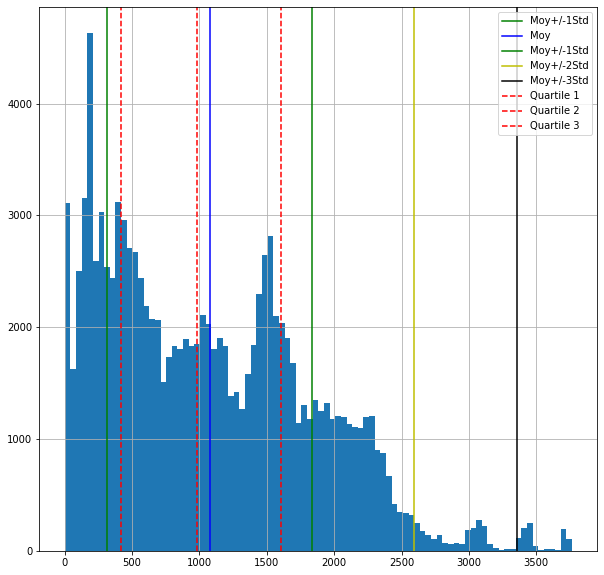



Etude de saturated-fat_100g:

Moyenne = 5.460092186237222
Ecart-type = 8.173083097659672
Coef de Variation = 1.4968763930874374
Percentile à la moyenne:
	69% < à moyenne
	31% > à moyenne
Percentile à la moyenne + 1Std:
	86% < à moyenne+1Std
	14% > à moyenne+1Std
	Valeur à moyenne+1std: 13.8
86 % des individus se répartissent sur 13.8 % de l'intervalle
Concentration intervalle: 714921.7391304347
Concentration hors intervalle: 18632.01856148492
Proba: 0.9746003365586875
Ratio de concentration: 38.370600414078666
Quantile 1 = 0.4
Quantile 2 = 2.0
Quantile 3 = 7.5
Nombre de classe:  90
L'amplitude de classe est: 1
classe modale:  (-0.1, 1.111]
effectif de la classe modale= 46522


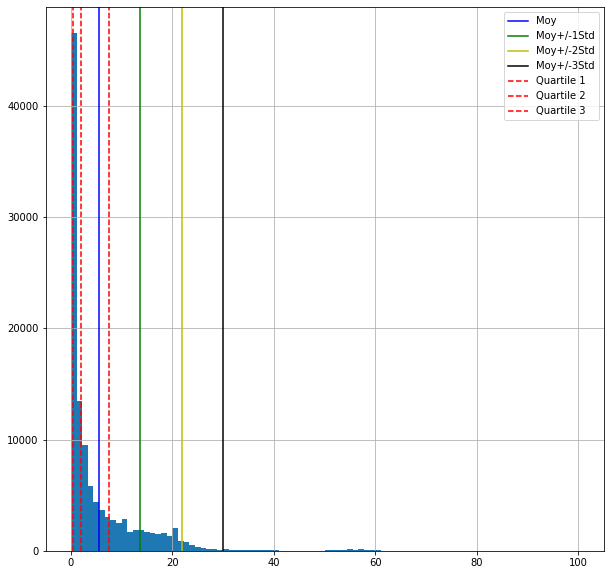



Etude de fiber_100g:

Moyenne = 3.0558694348465276
Ecart-type = 4.921021257671826
Coef de Variation = 1.6103506260957023
Percentile à la moyenne:
	69% < à moyenne
	31% > à moyenne
Percentile à la moyenne + 1Std:
	91% < à moyenne+1Std
	9% > à moyenne+1Std
	Valeur à moyenne+1std: 7.9
91 % des individus se répartissent sur 7.9 % de l'intervalle
Concentration intervalle: 1321458.2278481012
Concentration hors intervalle: 11210.42345276873
Proba: 0.9915879889259601
Ratio de concentration: 117.87763713080169
Quantile 1 = 0.5
Quantile 2 = 1.7
Quantile 3 = 3.7
Nombre de classe:  90
L'amplitude de classe est: 1
classe modale:  (-0.1, 1.111]
effectif de la classe modale= 47734


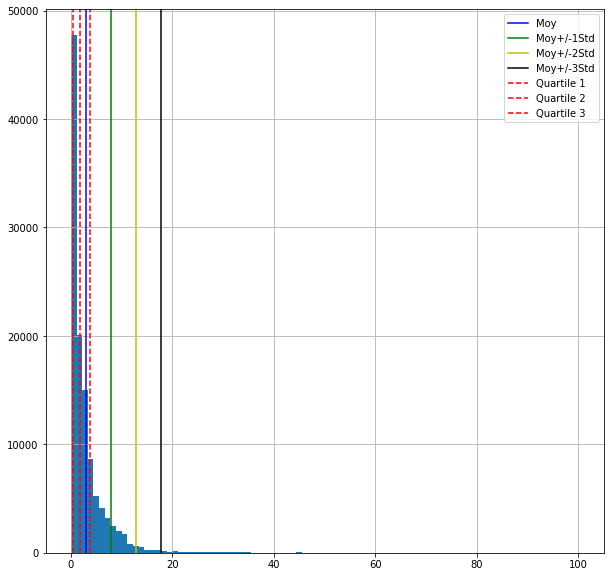



Etude de proteins_100g:

Moyenne = 8.235279250446272
Ecart-type = 8.293415505071602
Coef de Variation = 1.0070594150917445
Percentile à la moyenne:
	63% < à moyenne
	37% > à moyenne
Percentile à la moyenne + 1Std:
	85% < à moyenne+1Std
	15% > à moyenne+1Std
	Valeur à moyenne+1std: 16.8
85 % des individus se répartissent sur 16.8 % de l'intervalle
Concentration intervalle: 580428.5714285714
Concentration hors intervalle: 20682.692307692305
Proba: 0.9655925723648281
Ratio de concentration: 28.063492063492063
Quantile 1 = 2.1
Quantile 2 = 6.0
Quantile 3 = 12.0
Nombre de classe:  90
L'amplitude de classe est: 1
classe modale:  (-0.1, 1.111]
effectif de la classe modale= 21997


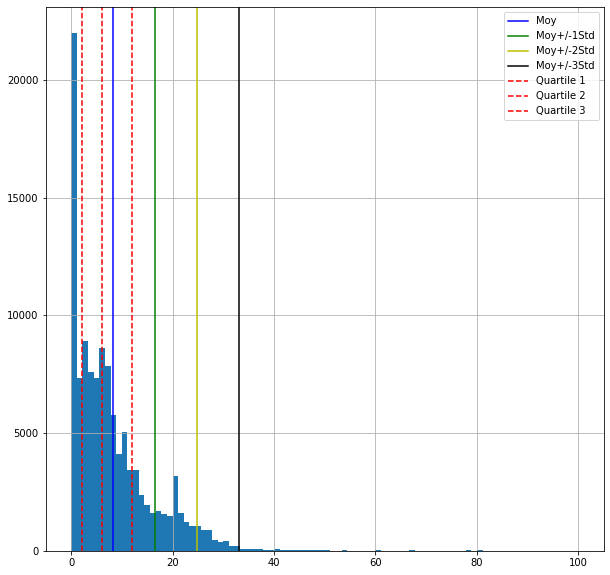



Etude de sodium_100g:

Moyenne = 0.5640468982753483
Ecart-type = 2.28779427500136
Coef de Variation = 4.056035556611708
Percentile à la moyenne:
	73% < à moyenne
	27% > à moyenne
Percentile à la moyenne + 1Std:
	99% < à moyenne+1Std
	1% > à moyenne+1Std
	Valeur à moyenne+1std: 4.696199999999954
99 % des individus se répartissent sur 4.696 % de l'intervalle
Concentration intervalle: 2418500.851788757
Concentration hors intervalle: 1203.7270209015362
Proba: 0.9995025314117091
Ratio de concentration: 2009.1771720613292
Quantile 1 = 0.04
Quantile 2 = 0.281316
Quantile 3 = 0.6
Nombre de classe:  90
L'amplitude de classe est: 1
classe modale:  (-0.1, 1.111]
effectif de la classe modale= 107156


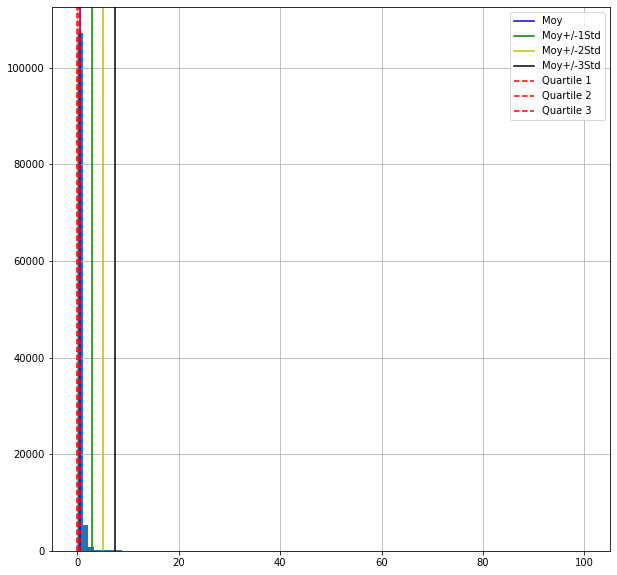



Etude de nutrition-score-fr_100g:

Moyenne = 8.430975997754176
Ecart-type = 8.96319204827308
Coef de Variation = 1.0631262680217182
Percentile à la moyenne:
	52% < à moyenne
	48% > à moyenne
Percentile à la moyenne + 1Std:
	82% < à moyenne+1Std
	18% > à moyenne+1Std
	Valeur à moyenne+1std: 18.0
82 % des individus se répartissent sur 62.264 % de l'intervalle
Concentration intervalle: 112590.6462803546
Concentration hors intervalle: 40779.520881916476
Proba: 0.7341104750914805
Ratio de concentration: 2.7609604979513747
Quantile 1 = 1.0
Quantile 2 = 8.0
Quantile 3 = 15.0
Nombre de classe:  85
L'amplitude de classe est: 1
classe modale:  (-0.0353, 0.588]
effectif de la classe modale= 4986


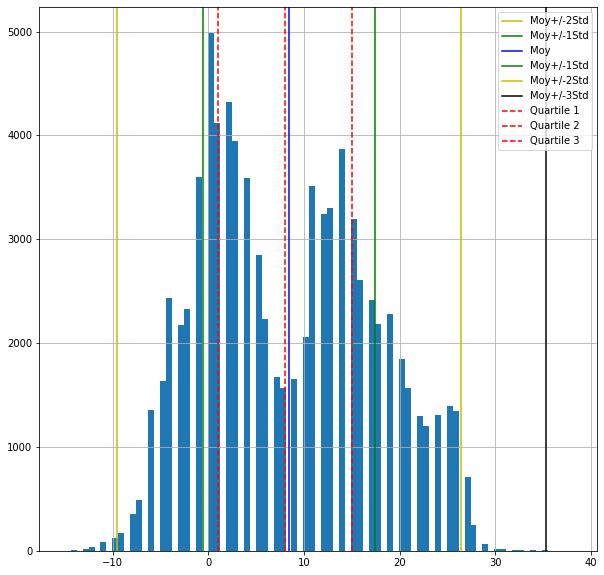

In [42]:
graph(datas, cols)

Maintenant que je connais la structure des variables, je vais essayer de retrouver la même en générant des valeurs aléatoires pour compléter les valeurs manquantes

[3493.08316667 2238.08316667 2572.74983333 ... 1275.9165     1317.74983333
  983.08316667]
[3477.4 2227.1 2565.4 ... 1258.  1333.8  975.9]


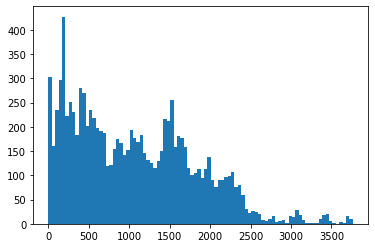

In [22]:
truc = datas[datas["energy_100g"].notna() == True]["energy_100g"]

nb_values = len(truc.index)
bins_path = round(1 + math.log2(nb_values)) * 5

hist, bins = np.histogram(truc, bins=bins_path, density=False)
# print(f"Bons = {bins}")
ampl_classes = round((truc.max() - truc.min()) / bins_path, 3)
# print(f"Amplitude = {ampl_classes}")
ampl2 = ampl_classes / 2
centre_cl = bins[:-1] + ampl2
# print(f"Centre classes = {centre_cl}")
result = np.random.choice(centre_cl, 10000, p= hist / nb_values)
print(result)
# print(truc)

rints = np.array([np.random.uniform(low= x-ampl2, high= x+ampl2) for x in result]).round(1)
print(rints)
plt.hist(rints, bins)
plt.show()


In [6]:
colonnes = ["energy_100g", "saturated-fat_100g", "fiber_100g", "proteins_100g", "sodium_100g"]

def complete(datas, cols):

    for col in cols:
        val_notna = datas[datas[col].notna() == True][col]
        val_na = pd.DataFrame(datas[datas[col].isnull() == True][col])
        
        nb_values = len(val_notna.index)
        bins_path = round(1 + math.log2(nb_values)) * 5

        hist, bins = np.histogram(val_notna, bins=bins_path, density=False)
        
        ampl_classes = round((val_notna.max() - val_notna.min()) / bins_path, 3)
        ampl2 = ampl_classes / 2
        centre_cl = bins[:-1] + ampl2
        
        result = np.random.choice(centre_cl, len(datas[datas[col].isnull() == True]), p= hist / nb_values)

        val_na.loc[:,col] = np.array([np.random.uniform(low= x-ampl2, high= x+ampl2) for x in result]).round(1)
        
        datas[col] = datas[col].mask(datas[col].isnull(), val_na[col])
        
    return datas


In [7]:
datas = complete(datas, colonnes)


Covariance et PCA des mêmes variables pour voir leurs corrélations afin de compléter nutrition-score-fr_100g par régression linéaire

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaled = pd.DataFrame(sc.fit_transform(datas[cols]), columns=cols)

datas_RegNotNA = scaled[scaled["nutrition-score-fr_100g"].notna() == True][cols]
datas_RegNA = scaled[scaled["nutrition-score-fr_100g"].notna() == False][cols]


In [9]:
datas_RegNotNA.corr()

,energy_100g,saturated-fat_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.600738,0.137257,0.199051,-0.015484,0.589494
saturated-fat_100g,0.600738,1.000000,0.001169,0.137890,0.002966,0.609737
fiber_100g,0.137257,0.001169,1.000000,0.095455,-0.002442,-0.072610
proteins_100g,0.199051,0.137890,0.095455,1.000000,0.087130,0.096891
sodium_100g,-0.015484,0.002966,-0.002442,0.087130,1.000000,0.115086
nutrition-score-fr_100g,0.589494,0.609737,-0.072610,0.096891,0.115086,1.000000


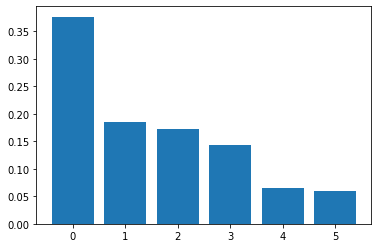

In [10]:
import prince

pca = prince.PCA(n_components=6, rescale_with_std=True, rescale_with_mean=True, copy=True, engine="auto", random_state=42)
pca = pca.fit(datas_RegNotNA)
pca.transform(datas_RegNotNA)
inertia = pca.explained_inertia_

plt.bar([x for x in range(len(inertia))], inertia)
plt.show()


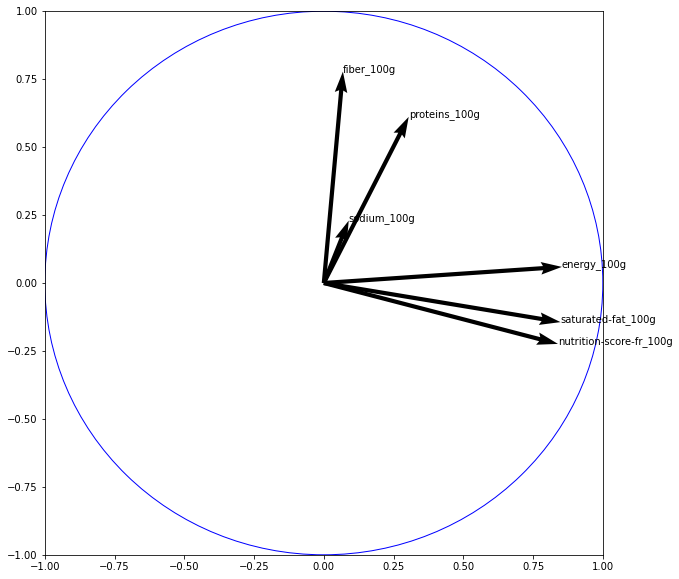

In [11]:
correl = pca.column_correlations(datas_RegNotNA)

fig, ax = plt.subplots(figsize=(10,10))
plt.quiver(np.zeros(correl.shape[0]), np.zeros(correl.shape[0]), correl[0], correl[1], angles='xy', scale_units='xy', scale=1,)
for i, nom in enumerate(correl.index):
    plt.text(correl.iloc[i,0], correl.iloc[i,1], nom)
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.show()


In [12]:
correl[0]

energy_100g                0.853338
fiber_100g                 0.068405
nutrition-score-fr_100g    0.839182
proteins_100g              0.304190
saturated-fat_100g         0.848344
sodium_100g                0.089254
Name: 0, dtype: float64

D'après la matrice de corrélation et la PCA, on peut voir que nutrition-score-fr_100g est fortement corrélé à energy_100g et saturated-fat_100g

La corrélation avec proteins_100g est faible mais pas négligeable

sodium_100g et fiber_100g ne sont pas corrélé avec nutrition-score-fr_100g

Je peux utiliser ces variables sans inquiétudes pour compléter nutrition-score-fr_100g

Je prendrai quand même en compte sodium_100g et fiber_100g car ils sont officiellement pris en compte dans le calcul

In [13]:
import joblib
from sklearn.linear_model import LinearRegression

cols2 = ["energy_100g", "saturated-fat_100g", "proteins_100g"]

with joblib.parallel_backend("loky", n_jobs=4):
    for num, col in enumerate([colonnes, cols2]):
        X_notna = datas_RegNotNA[col]
        Y_notna = datas_RegNotNA["nutrition-score-fr_100g"]

        reg = LinearRegression()
        reg.fit(X_notna, Y_notna)
        print(f"{num}/ R² = {reg.score(X_notna, Y_notna)}")


0/ R² = 0.48002457362776163
1/ R² = 0.4505329340389439


La régression linéaire n'est pas convainquante, je vais essayer le KNN

C:\Users\nanar\AppData\Local\Programs\Python\Python39\lib\site-packages\distributed\node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 60998 instead
  warnings.warn(


***** 1/ *****
KNeighbor Regressor, weight => uniform


Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x0000019DD26BC940>
Traceback (most recent call last):
  File "C:\Users\nanar\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\_dask.py", line 80, in on_destroy
    del self._data[key]
KeyError: 1777351807792
Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x0000019DE27B54C0>
Traceback (most recent call last):
  File "C:\Users\nanar\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\_dask.py", line 80, in on_destroy
    del self._data[key]
KeyError: 1777636845296


le nombre de neighbors optimal est 10 à 14.120658142632747


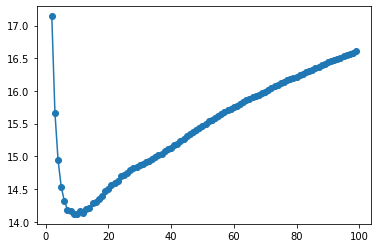

KNeighbor Regressor, weight => distance


Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x0000019DD9606160>
Traceback (most recent call last):
  File "C:\Users\nanar\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\_dask.py", line 80, in on_destroy
    del self._data[key]
KeyError: 1777450629712
Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x0000019DD853D9D0>
Traceback (most recent call last):
  File "C:\Users\nanar\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\_dask.py", line 80, in on_destroy
    del self._data[key]
KeyError: 1777450740400
Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x0000019DD853D940>
Traceback (most recent call last):
  File "C:\Users\nanar\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\_dask.py", line 80, in on_destroy
    del self._data[key]
KeyError: 1777450740304


le nombre de neighbors optimal est 12 à 13.583215904996715


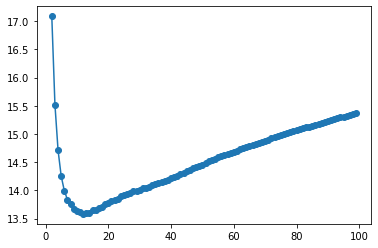

***** 2/ *****
KNeighbor Regressor, weight => uniform


Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x0000019DE2D9B8B0>
Traceback (most recent call last):
  File "C:\Users\nanar\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\_dask.py", line 80, in on_destroy
    del self._data[key]
KeyError: 1777626267984
Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x0000019DE2D9B430>
Traceback (most recent call last):
  File "C:\Users\nanar\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\_dask.py", line 80, in on_destroy
    del self._data[key]
KeyError: 1777626269232
Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x0000019DE2DA5310>
Traceback (most recent call last):
  File "C:\Users\nanar\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\_dask.py", line 80, in on_destroy
    del self._data[key]
KeyError: 1777626271440
Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals

le nombre de neighbors optimal est 23 à 22.469824429474805


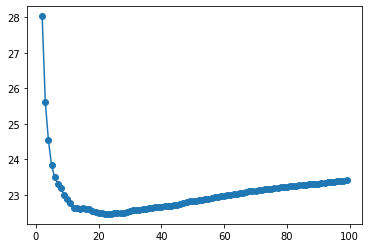

KNeighbor Regressor, weight => distance


Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x0000019DE572D940>
Traceback (most recent call last):
  File "C:\Users\nanar\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\_dask.py", line 80, in on_destroy
    del self._data[key]
KeyError: 1777662467984


le nombre de neighbors optimal est 40 à 21.57467579739044


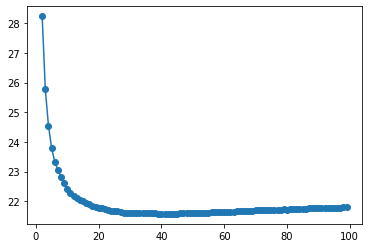

In [14]:
from sklearn.model_selection import train_test_split
cible = "nutrition-score-fr_100g"

from sklearn import neighbors
from dask.distributed import Client

client = Client(memory_limit="4GB", processes=False, n_workers=2, threads_per_worker=4, silence_logs="error")

n_neighb = 0
weight = ""
boolean = True
min_error = 0
numero = 0
with joblib.parallel_backend("dask"):
    for num, col in enumerate([colonnes, cols2]):
        print(f"***** {num+1}/ *****")
        xtrain, xtest, ytrain, ytest = train_test_split(datas_RegNotNA[col], datas_RegNotNA[cible], train_size=0.8)
        for w in ["uniform", "distance"]:
            errors = []
            print(f"KNeighbor Regressor, weight => {w}")
            for k in range(2,100):
                knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights=w)
                errors.append(100*(1 -knn.fit(xtrain, ytrain).score(xtest, ytest)))
            k = errors.index(min(errors)) +2
            print(f"le nombre de neighbors optimal est {k} à {min(errors)}")
            plt.plot(range(2,100), errors, 'o-')
            plt.show()
            if boolean:
                n_neighb = k
                weight = w
                boolean = False
                min_error = min(errors)
                numero = num
            else:
                if min(errors) < min_error:
                    n_neighb = k
                    weight = w
                    min_error = min(errors)
                    numero = num
        

In [15]:
print(f"Resultats:\nSet de colonnes n° {numero}\nNb de neighbors: {n_neighb}\nWeight: {weight}\nErreur: {min_error}")


Resultats:
Set de colonnes n° 0
Nb de neighbors: 12
Weight: distance
Erreur: 13.583215904996715


In [16]:
with joblib.parallel_backend("dask"):
    datas_to_pred = datas_RegNA[colonnes]

    xtrain, xtest, ytrain, ytest = train_test_split(datas_RegNotNA[colonnes], datas_RegNotNA[cible], train_size=0.8)
    
    knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighb, weights=weight)
    knn.fit(xtrain, ytrain)
    pred = knn.predict(datas_to_pred)

In [17]:
datas_RegNA["nutrition-score-fr_100g"] = pred
result_datas = pd.DataFrame(sc.inverse_transform(datas_RegNA), columns=datas_RegNA.columns, index=datas_RegNA.index)
result_datas["nutrition-score-fr_100g"] = result_datas["nutrition-score-fr_100g"].round(0)


In [18]:
datas_copy = datas.copy()
datas_copy["nutrition-score-fr_100g"] = datas_copy["nutrition-score-fr_100g"].mask(datas_copy["nutrition-score-fr_100g"].isnull(),
    result_datas["nutrition-score-fr_100g"])

In [19]:
datas_copy.loc[(datas_copy["nutriscore_grade"].isnull() == True) & (datas_copy["nutrition-score-fr_100g"] <= -1), "nutriscore_grade"] = "a"
datas_copy.loc[(datas_copy["nutriscore_grade"].isnull() == True) & (datas_copy["nutrition-score-fr_100g"] >= 0) & 
    (datas_copy["nutrition-score-fr_100g"] <= 2), "nutriscore_grade"] = "b"
datas_copy.loc[(datas_copy["nutriscore_grade"].isnull() == True) & (datas_copy["nutrition-score-fr_100g"] >= 3) & 
    (datas_copy["nutrition-score-fr_100g"] <= 10), "nutriscore_grade"] = "c"
datas_copy.loc[(datas_copy["nutriscore_grade"].isnull() == True) & (datas_copy["nutrition-score-fr_100g"] >= 11) & 
    (datas_copy["nutrition-score-fr_100g"] <= 18), "nutriscore_grade"] = "d"
datas_copy.loc[(datas_copy["nutriscore_grade"].isnull() == True) & (datas_copy["nutrition-score-fr_100g"] >= 19), "nutriscore_grade"] = "e"

In [20]:
datas_copy

,brands,manufacturing_places,countries,origins,product_name,nutriscore_grade,energy_100g,saturated-fat_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
0,Ferme de l'Aiguemarse,bénivay-ollon,en:France,Pacifique ou Atlantique,Nectar d'abricot,d,788.0,6.3,6.60,8.00,1.000,12.0
1,Natura4Ever,France,France,"France,Porc fermier",Naturablue original,c,0.0,0.0,0.40,0.00,0.500,5.0
2,Comme J’aime,France,France,France,Blanquette de Volaille et son Riz,b,450.0,0.9,0.50,6.80,0.280,0.0
3,Kirkland Signature,Brossard Québec,Canada,Québec,Salade Cesar,c,1210.0,7.0,2.00,22.00,0.864,6.0
4,Kirkland Signature,Brossard Québec,Canada,Québec,Danoises à la cannelle roulées,d,1520.0,24.4,2.05,4.79,0.369,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
114715,maison Gaucher,sorbiers,France,Océan Pacifique centre Ouest origine Fidji,cube mendiants,b,1408.8,1.8,6.10,18.80,0.800,2.0
114716,"Primora, Balance",Almeria,en:France,Espagne,Tomate côtelée,c,272.6,20.1,0.20,20.60,0.100,10.0
114717,super u,france,France,Poulet UE,pain batard cereales,d,1854.0,3.3,4.00,1.60,0.100,15.0
114718,nissin,Hongrie,France,"France,Agriculture France,AgroBio Périgord - 2...",cup noodles,c,351.0,2.0,0.00,1.80,0.400,4.0


In [21]:
# datas_copy.to_csv("PSante_06_app_products.csv", index=False, encoding="utf-8")